In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import seaborn as sns

/Users/sjtc/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/sjtc/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
digits = load_digits()
digits.images.shape # 数据集size

(1797, 8, 8)

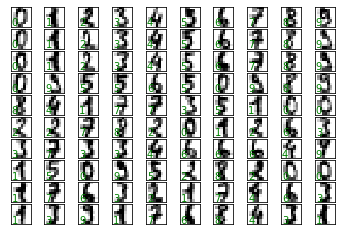

In [9]:
# 可视化
fig, axes = plt.subplots(10, 10,subplot_kw = {'xticks' : [], 'yticks' : []},
                       gridspec_kw = dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [10]:
# 图片数据维数过高，可以先进行降维处理，使用isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

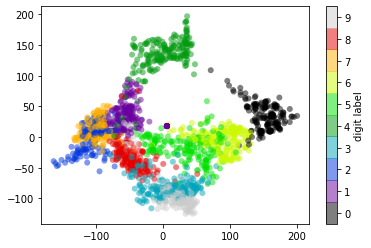

In [13]:
# 处理过的数据可视化
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target,
           edgecolors='none', alpha=0.5,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 0)

In [19]:
# 使用朴素贝叶斯进行分类
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_model = model.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.8333333333333334

Text(91.68, 0.5, 'true value')

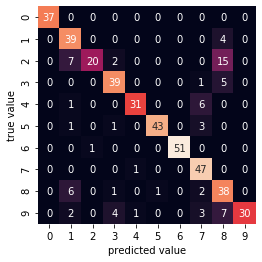

In [24]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')